
### WEEK 4: FRIDAY LAB 03

Assignment (10 points): Now that you are familiar with Cosine Similarity, Chi Square, Covariance, and Correlation, use Python (in Google Colab) to determine which three attributes in your assigned dataset are most closely associated.

    1. Be sure that your code works and is clearly written and commented. (5 points) 
    2. Then, answer the following questions ABOUT YOUR CODE (not as a general definition) in either comments or markdown:
        1. How did you decide which attributes to pick for your analysis? (1 point)
        2. What connections between the attributes do the results of your analysis reveal?  Were there any surprises? (2points)
        3. Would you be able to predict future values of one attribute from a correlation with one or two others? Research how you could do this in your chosen language and try it out. (2 points)

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.metrics.pairwise import cosine_similarity

#Reading the train HR Analytics: Job Change of Data Scientists dataframe
train = pd.read_csv('Job Change/aug_train.csv')


#Verifying that we can see the data
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


The chosen attributes for The Measures of Association are city_development_index, training_hours, and education_level

In [4]:
# Cosine similarity between city_development_index and training_hours
# Here is a solution that uses the spatial package from scipy

a = np.array(train.city_development_index)
b = np.array(train.training_hours)

result = 1 - spatial.distance.cosine(a, b)

# Now we need to convert the angle to radians to get the degrees
angle_in_radians = math.acos(result)
degrees = math.degrees(angle_in_radians)

print(result, degrees)

0.7285520594998155 43.234854952612196


In [5]:
#Covariance between the city_development_index and training_hours
np.cov([train.city_development_index], [train.training_hours], bias = True)[0][1]

0.014222330208250186

In [20]:
# Chi Square between the education_level and training_hours
chi2, p, dof, expected = chi2_contingency((pd.crosstab(train.education_level, train.training_hours).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 1039.131804572551 ,p-value: 0.03805817783624968, Degrees of Freedom: 960


In [23]:
# Chi Square between the education_level and city_development_index
chi2, p, dof, expected = chi2_contingency((pd.crosstab(train.education_level, train.city_development_index).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 2357.574726134293 ,p-value: 1.3239164783102352e-286, Degrees of Freedom: 368


In [24]:
#train dataset covariance
corr = train.corr()
corr

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


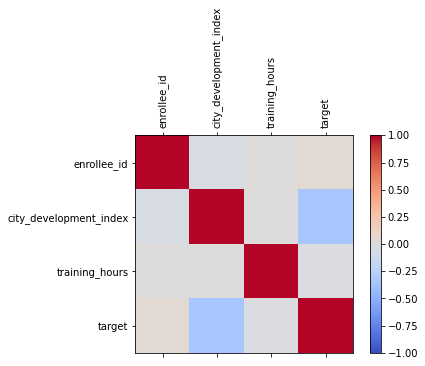

In [22]:
#train dataset covariance heatmap
# Now we can make a pretty correlation heatmap with pyplot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [19]:
# correlation between the city_development_index and training_hours
train['city_development_index'].corr(train['training_hours'])

0.0019197234754897863

2. 
       1. 


       To conduct out all of the Measures of association, I chose two numeric and one categorical characteristics from the dataset: city development index and training hours, as well as the categorical data education level.

2. 
       2. 


        Both city development index and training hours have a positive covariance and are positively associated, according to the measures of association covariance. It was surprising to learn that education level is dependant to training hours.

2. 
        2. 
        
        Yes, we could forecast future values of one property based on a correlation with another one. I could forecast it by determining the coveriance and correlation to establish the nature of their relationship, such as thetraining_hours and target.

In [26]:
# Covariance of the training_hours and the target
np.cov([train.training_hours], [train.target], bias = True)[0][1]

-0.5606359638690533

In [27]:
# correlation between the training_hours and target
train['training_hours'].corr(train['target'])

-0.021577249713613286

This demonstrates that when training hours increase, the target future may be anticipated to decrease.